<a href="https://colab.research.google.com/github/nrrajuu/Deep-Learning/blob/main/Lung%20Cancer%20Detection%20using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import required libraries
import numpy as np
import pandas
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [ ]:
#Creating Directory
main_dir = "C:\\Users\\pratham sharma\\Desktop\\Lung_Cancer"
dir_train = os.path.join(main_dir,'train')
dir_test = os.path.join(main_dir,'test')

dir_adenocarcinoma = os.path.join(dir_train,'adenocarcinoma')
dir_normal = os.path.join(dir_train,'normal')
dir_largecellcarninoma = os.path.join(dir_train,'large.cell.carninoma')
dir_squamouscellcarcinoma = os.path.join(dir_train,'squamous.cell.carcinoma')

os.mkdir(dir_train)
os.mkdir(dir_test)
os.mkdir(dir_normal)
os.mkdir(dir_largecellcarninoma)
os.mkdir(dir_squamouscellcarcinoma)
os.mkdir(dir_adenocarcinoma)


In [ ]:
#locate dirtory of data set
DIR='C:\\Users\\pratham sharma\\Desktop\\Lung_Cancer'
DIR_Data='C:\\Users\\pratham sharma\\Desktop\\Lung_Cancer\\Orignal_dataset'


In [ ]:
# Read dataset of train and test file
import pandas
train=pandas.read_csv('C:\\Users\\pratham sharma\\Desktop\\Lung_Cancer\\train.csv')
test=pandas.read_csv('C:\\Users\\pratham sharma\\Desktop\\Lung_Cancer\\Val.csv')
train.head()

,image_id,adenocarcinoma,large.cell.carninoma,normal,squamous.cell.carcinoma
0,Train_1,1,0,0,0
1,Train_2,1,0,0,0
2,Train_3,1,0,0,0
3,Train_4,1,0,0,0
4,Train_5,1,0,0,0


In [ ]:
test.head()

,image_id
0,Test_1
1,Test_2
2,Test_3
3,Test_4
4,Test_5


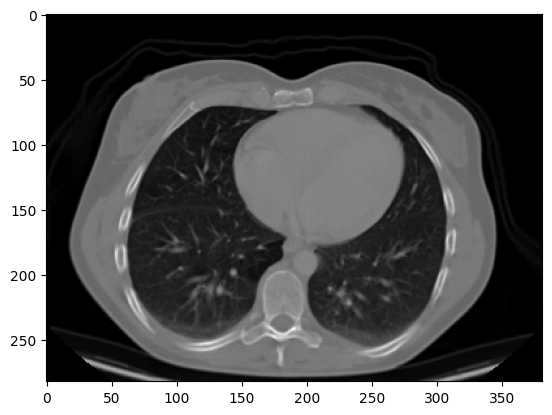

In [ ]:
# opening the sample
image = Image.open(r'Orignal_dataset/Test_1.png')
plt.imshow(image)
plt.show()

In [ ]:
# Preparing Dataset
class_names=train.loc[:,'adenocarcinoma':].columns
print(class_names)

NameError: name 'train' is not defined

In [ ]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number=number+1

In [ ]:
DIR_Data

'C:\\Users\\pratham sharma\\Desktop\\Lung_Cancer\\Orignal_dataset'

In [ ]:
natsort.natsorted(os.listdir(DIR_Data))

['Test_1.png',
 'Test_2.png',
 'Test_3.png',
 'Test_4.png',
 'Test_5.png',
 'Test_6.png',
 'Test_7.png',
 'Test_8.png',
 'Test_9.png',
 'Test_10.png',
 'Test_11.png',
 'Test_12.png',
 'Test_13.png',
 'Test_14.png',
 'Test_15.png',
 'Test_16.png',
 'Test_17.png',
 'Test_18.png',
 'Test_19.png',
 'Test_20.png',
 'Test_21.png',
 'Test_22.png',
 'Test_23.png',
 'Test_24.png',
 'Test_25.png',
 'Test_26.png',
 'Test_27.png',
 'Test_28.png',
 'Test_29.png',
 'Test_30.png',
 'Test_31.png',
 'Test_32.png',
 'Test_33.png',
 'Test_34.png',
 'Test_35.png',
 'Test_36.png',
 'Test_37.png',
 'Test_38.png',
 'Test_39.png',
 'Test_40.png',
 'Test_41.png',
 'Test_42.png',
 'Test_43.png',
 'Test_44.png',
 'Test_45.png',
 'Test_46.png',
 'Test_47.png',
 'Test_48.png',
 'Test_49.png',
 'Test_50.png',
 'Test_51.png',
 'Test_52.png',
 'Test_53.png',
 'Test_54.png',
 'Test_55.png',
 'Test_56.png',
 'Test_57.png',
 'Test_58.png',
 'Test_59.png',
 'Test_60.png',
 'Test_61.png',
 'Test_62.png',
 'Test_63.png',
 

In [ ]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [ ]:
import shutil
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR_Data))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR_Data,img)

        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'C:\Users\pratham sharma\Desktop\Lung_Cancer\train\adenocarcinoma')

            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'C:\Users\pratham sharma\Desktop\Lung_Cancer\train\large.cell.carninoma')

            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'C:\Users\pratham sharma\Desktop\Lung_Cancer\train\normal')

            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'C:\Users\pratham sharma\Desktop\Lung_Cancer\train\squamous.cell.carcinoma')

        elif search("Test",img):
            shutil.copy(path,r'C:\Users\pratham sharma\Desktop\Lung_Cancer\test')


In [ ]:
train_dir=create_train_data()

100%|██████████| 928/928 [00:02<00:00, 355.47it/s]


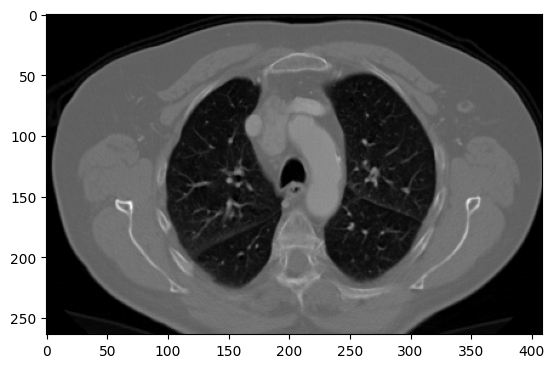

In [ ]:
# Data Processing
Train_DIR = r'C:\Users\pratham sharma\Desktop\AjaySir\Lung_Cancer\train'
Categories=['adenocarcinoma','large.cell.carninoma','normal','squamous.cell.carcinoma']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break


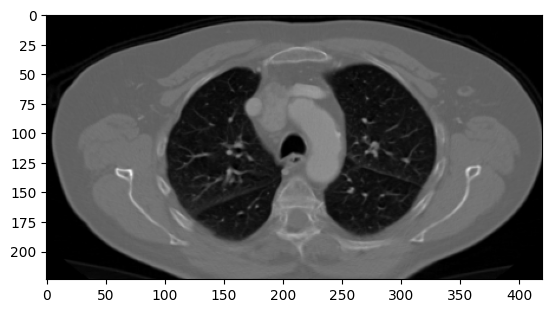

In [ ]:
IMG_SIZE_X=420
IMG_SIZE_Y=224
new_image=cv2.resize(old_image,(IMG_SIZE_X,IMG_SIZE_Y))
plt.imshow(new_image)
plt.show()

In [ ]:
# Model Preparation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D

In [ ]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'C:\Users\pratham sharma\Desktop\AjaySir\Lung_Cancer\train',
                                         target_size=(IMG_SIZE_X,IMG_SIZE_Y),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'C:\Users\pratham sharma\Desktop\AjaySir\Lung_Cancer\test',
                                         target_size=(IMG_SIZE_X,IMG_SIZE_Y),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

Found 491 images belonging to 4 classes.
Found 122 images belonging to 4 classes.


In [ ]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(420, 224, 3))

In [ ]:
model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE_X,IMG_SIZE_Y,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_294 (Conv2D)         (None, 420, 224, 64)      1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 210, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_295 (Conv2D)         (None, 210, 112, 64)      36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 105, 56, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_296 (Conv2D)         (None, 105, 56, 64)       36928     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 52, 28, 64)      

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [ ]:
checkpoint=ModelCheckpoint(r'C:\Users\pratham sharma\Desktop\AjaySir\Lung_Cancer\Model.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [ ]:
# Model traning
model_history=model.fit(train_datagen,validation_data=val_datagen,
                        epochs=5,
                        steps_per_epoch=train_datagen.samples//16,
                        validation_steps=val_datagen.samples//16,
                        callbacks=callbacks)

Epoch 1/5
30/30 [==============================] - ETA: 0s - loss: 1.2892 - accuracy: 0.3516
Epoch 1: val_loss improved from inf to 1.12061, saving model to C:\Users\pratham sharma\Desktop\AjaySir\Lung_Cancer\Model.h5
30/30 [==============================] - 56s 2s/step - loss: 1.2892 - accuracy: 0.3516 - val_loss: 1.1206 - val_accuracy: 0.4643
Epoch 2/5
30/30 [==============================] - ETA: 0s - loss: 1.0797 - accuracy: 0.4863
Epoch 2: val_loss improved from 1.12061 to 0.95238, saving model to C:\Users\pratham sharma\Desktop\AjaySir\Lung_Cancer\Model.h5
30/30 [==============================] - 51s 2s/step - loss: 1.0797 - accuracy: 0.4863 - val_loss: 0.9524 - val_accuracy: 0.6071
Epoch 3/5
30/30 [==============================] - ETA: 0s - loss: 0.9671 - accuracy: 0.5284
Epoch 3: val_loss improved from 0.95238 to 0.84719, saving model to C:\Users\pratham sharma\Desktop\AjaySir\Lung_Cancer\Model.h5
30/30 [==============================] - 50s 2s/step - loss: 0.9671 - accuracy: 

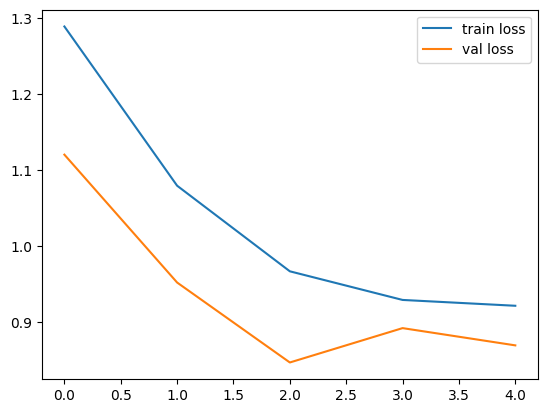

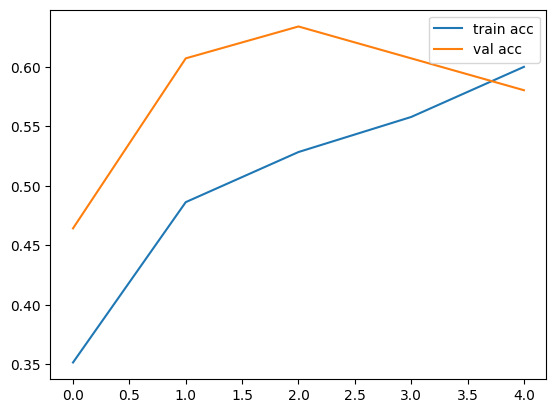

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model_history.history['accuracy'], label='train acc')
plt.plot(model_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# predict probabilities for test set
yhat_probs = model.predict(val_datagen, verbose=0)
yhat_probs

array([[6.17688596e-01, 1.20779328e-01, 1.08913416e-02, 2.50640690e-01],
       [1.62142053e-01, 6.41050577e-01, 4.64466028e-03, 1.92162722e-01],
       [2.18151614e-01, 4.72521275e-01, 4.88376245e-03, 3.04443270e-01],
       [7.03864038e-01, 8.02653506e-02, 3.95026468e-02, 1.76368013e-01],
       [3.21887195e-01, 3.99554282e-01, 9.61365923e-03, 2.68944830e-01],
       [6.44863069e-01, 1.56679615e-01, 2.77093332e-02, 1.70748010e-01],
       [5.95482111e-01, 2.04947457e-01, 2.52706707e-02, 1.74299762e-01],
       [1.87550992e-01, 4.60366249e-01, 7.62098609e-03, 3.44461709e-01],
       [1.03864536e-01, 7.11385608e-01, 6.42662449e-03, 1.78323269e-01],
       [1.56252071e-01, 6.73537731e-01, 5.32768993e-03, 1.64882511e-01],
       [4.61140530e-08, 1.14097376e-03, 9.98859048e-01, 2.75645173e-10],
       [6.44593298e-01, 3.04558426e-01, 1.73148867e-02, 3.35334316e-02],
       [3.28573912e-01, 4.09605354e-01, 1.46202361e-02, 2.47200504e-01],
       [2.63832837e-01, 2.22431749e-01, 2.75027137e

In [ ]:
#Precision, recall, f1-score, support
Y_pred = model.predict(val_datagen, val_datagen.samples / 16)
val_preds = np.argmax(Y_pred, axis=1)
import sklearn.metrics as metrics
val_trues =val_datagen.classes
from sklearn.metrics import classification_report
report = classification_report(val_trues, val_preds)
print(report)
cm = metrics.confusion_matrix(val_trues, val_preds)
cm

8/8 [==============================] - 5s 502ms/step
              precision    recall  f1-score   support

           0       0.35      0.69      0.46        39
           1       0.17      0.13      0.15        23
           2       0.25      0.17      0.20        29
           3       0.50      0.10      0.16        31

    accuracy                           0.31       122
   macro avg       0.32      0.27      0.24       122
weighted avg       0.33      0.31      0.26       122



array([[27,  4,  7,  1],
       [16,  3,  4,  0],
       [18,  4,  5,  2],
       [17,  7,  4,  3]], dtype=int64)

In [ ]:
import sklearn.metrics
recall = sklearn.metrics.recall_score(val_trues, val_preds, average='micro', pos_label="positive")
print(recall)

0.3114754098360656


c:\Users\pratham sharma\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
val_trues

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

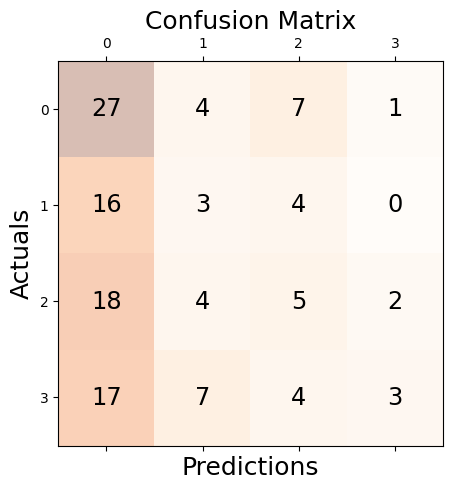

In [ ]:
# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#Model pridection section
y_pred = model.predict(val_datagen)
y_pred

8/8 [==============================] - 5s 538ms/step


array([[3.89180213e-01, 3.78367037e-01, 1.08688334e-02, 2.21584022e-01],
       [4.94733363e-01, 3.40305874e-03, 4.89192009e-01, 1.26715908e-02],
       [6.63417280e-01, 8.32448751e-02, 3.65931280e-02, 2.16744721e-01],
       [5.12891293e-01, 1.83021978e-01, 3.75365093e-02, 2.66550243e-01],
       [7.56416857e-01, 2.69361008e-02, 1.46457180e-01, 7.01897815e-02],
       [6.46953881e-01, 1.46389529e-01, 8.90867859e-02, 1.17569819e-01],
       [5.98862529e-01, 8.86784866e-02, 1.75635349e-02, 2.94895500e-01],
       [5.15066683e-01, 2.34148651e-01, 4.29926254e-02, 2.07792103e-01],
       [5.23002684e-01, 2.87934244e-01, 5.70172742e-02, 1.32045791e-01],
       [1.05509942e-03, 1.14326052e-04, 9.98828590e-01, 2.01294938e-06],
       [3.00774753e-01, 3.66403013e-01, 6.24397211e-03, 3.26578230e-01],
       [4.84739661e-01, 1.46448612e-01, 6.36652336e-02, 3.05146456e-01],
       [4.96169150e-01, 2.37425044e-01, 6.36907443e-02, 2.02715039e-01],
       [7.07485080e-01, 9.28955749e-02, 2.68291701e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3,
       0, 2, 1, 0, 2, 0, 0, 2, 3, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 3, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1,
       0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 1,
       0, 0, 0, 3, 0, 0, 2, 0, 1, 3, 0, 2, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1,
       3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [ ]:
classes = ["AdenocarcinomaChest Lung Cancer ","Large cell carcinoma Lung Cancer" , "NO Lung Cancer/ NORMAL" , "Squamous cell carcinoma Lung Cancer"]

In [ ]:
#Model Pridiction
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

model = load_model(r"C:\Users\pratham sharma\Desktop\AjaySir\Lung_Cancer\Model.h5")
test_image = image.load_img(r"C:\Users\pratham sharma\Desktop\AjaySir\Plant_pathology\train\rust\Train_726.jpg", target_size = (420,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
print(classes[np.argmax(model.predict(test_image))])


1/1 [==============================] - 0s 154ms/step
NO Lung Cancer/ NORMAL
